## Car Price.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory analysis.

In [ ]:
car = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bases de datos/CarPrice_Assignment.csv')

In [ ]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

- The dataset does not have null values.
- We separate the CarName column in two columns, to describe the company that produces the cars and the type of car.

- We eliminate the columns: 'Car_ID' and 'CarName' to simplify the analysis.

In [ ]:
company = car['CarName'].apply(lambda x : x.split(' ')[0])
car.insert(2, 'company', company)

In [ ]:
car.drop('car_ID', axis = 1, inplace = True)
car.drop('CarName', axis = 1, inplace = True)

In [ ]:
car.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
car.company = car.company.str.lower()

In [ ]:
def change(x, y):
  car.company.replace(x, y, inplace = True)

In [ ]:
change('maxda', 'mazda')
change('porcshce', 'porsche')
change('toyouta', 'toyota')
change('vokswagen', 'volkswagen')
change('vw', 'volkswagen')

In [ ]:
car.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

- We change the car names that were badly write.

In [ ]:
def uniqueva(df):
  lst = list(df.select_dtypes(include = 'object').columns)
  for i in lst:
    val = car[i].unique()
    print(val)

In [ ]:
uniqueva(car)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


- We can see that the columns are well structured.

In [ ]:
car[car.duplicated()]

,symboling,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


- We see that there are not rows repeated.

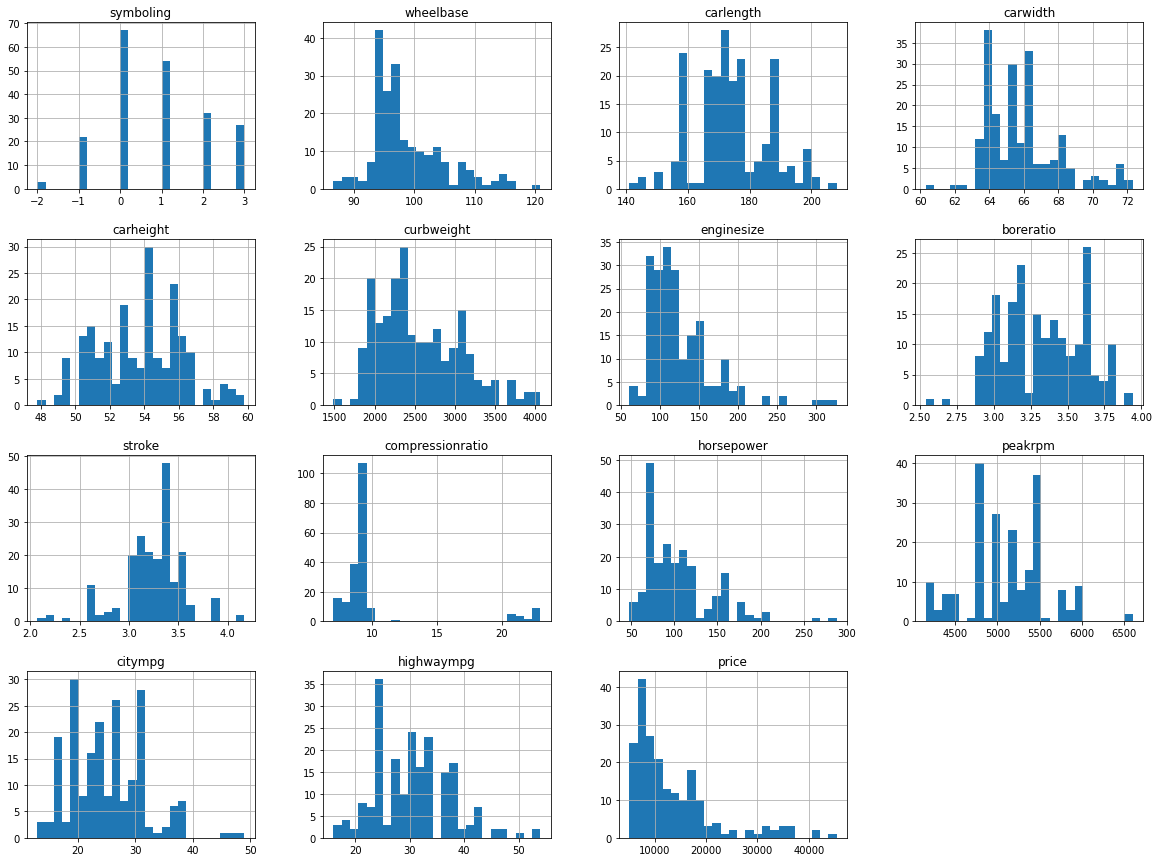

In [ ]:
car.hist(figsize = (20,15), bins = 25)

plt.show()

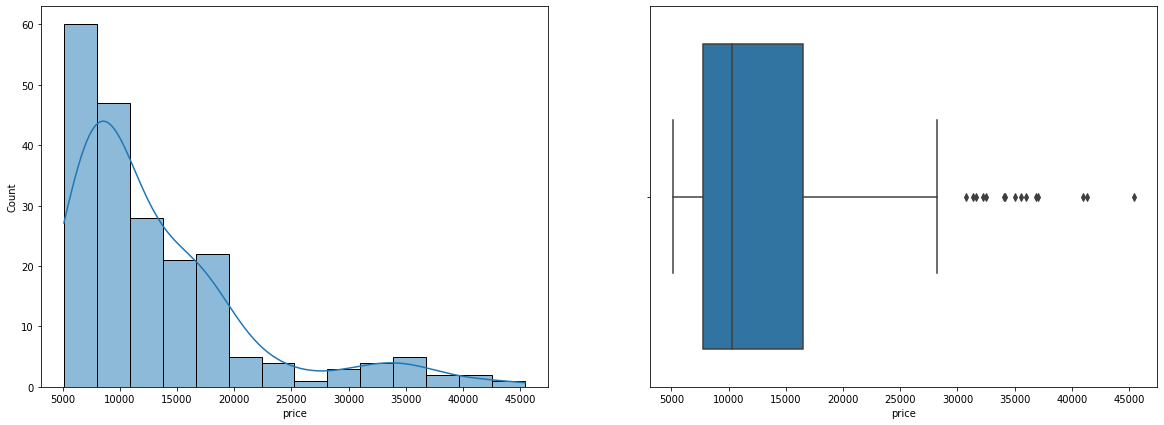

In [ ]:
plt.figure(figsize = (20,7))

plt.subplot(1,2,1)
sns.histplot(x = car.price, kde = True)

plt.subplot(1,2,2)
sns.boxplot(x = car.price)

plt.show()

- The price is skewed to right, which tell us that the car prices are mainly low. So, we can think the high prices are outliers.

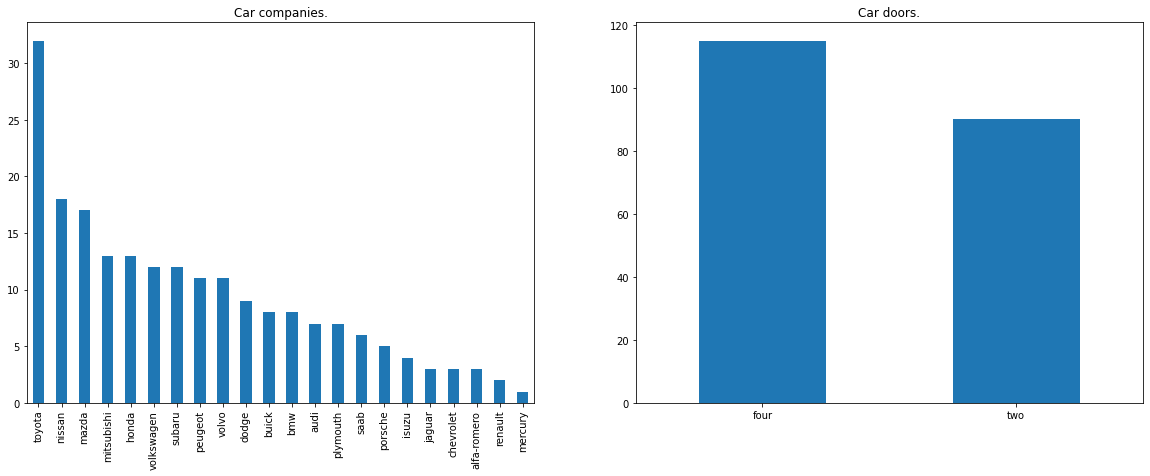

In [ ]:
plt.figure(figsize = (20,7))

plt.subplot(1,2,1)
car['company'].value_counts().plot(kind = 'bar', title = 'Car companies.')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
car['doornumber'].value_counts().plot(kind = 'bar', title = 'Car doors.', )
plt.xticks(rotation = 0)

plt.show()

- Toyota, Nissa and Mazda are the top companies.
- The four doors' cars are more prelevants

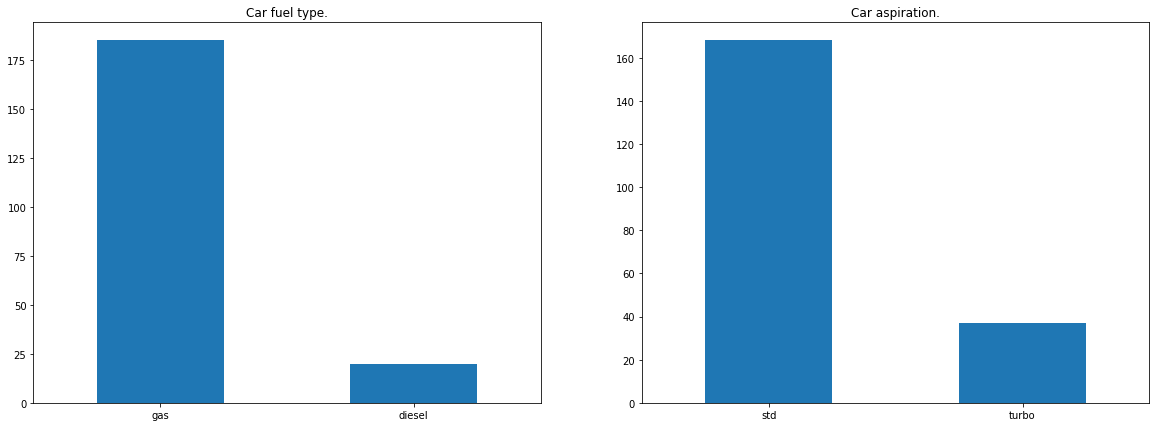

In [ ]:
plt.figure(figsize = (20,7))

plt.subplot(1,2,1)
car['fueltype'].value_counts().plot(kind = 'bar', title = 'Car fuel type.')
plt.xticks(rotation = 0)

plt.subplot(1,2,2)
car['aspiration'].value_counts().plot(kind = 'bar', title = 'Car aspiration.')
plt.xticks(rotation = 0)


plt.show()

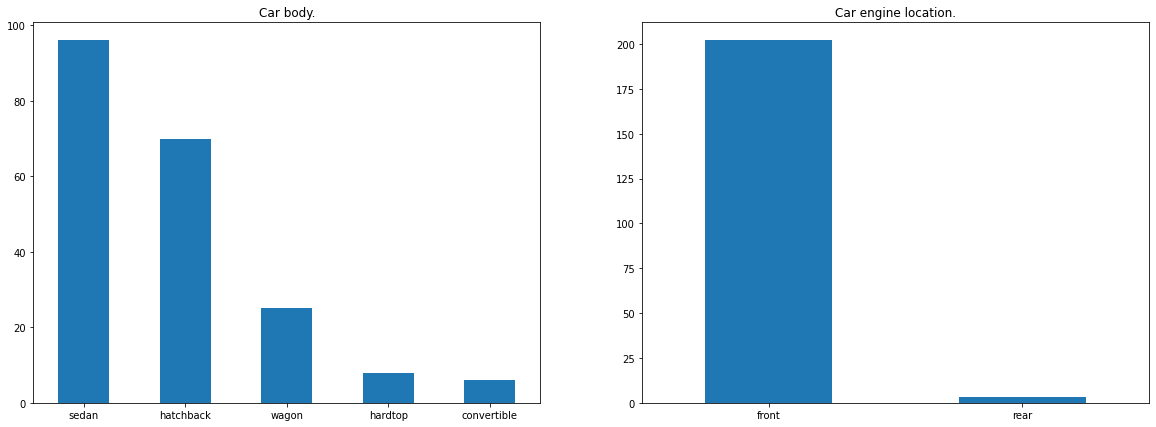

In [ ]:
plt.figure(figsize = (20,7))

plt.subplot(1,2,1)
car['carbody'].value_counts().plot(kind = 'bar', title = 'Car body.')
plt.xticks(rotation = 0)

plt.subplot(1,2,2)
car['enginelocation'].value_counts().plot(kind = 'bar', title = 'Car engine location.')
plt.xticks(rotation = 0)

plt.show()


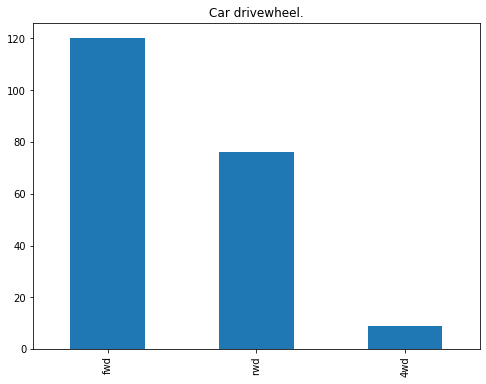

In [ ]:
plt.figure(figsize = (8, 6))

car['drivewheel'].value_counts().plot(kind = 'bar', title = 'Car drivewheel.')

plt.show()

In [ ]:
car.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [ ]:
car.doornumber.replace('four', 4, inplace = True)

In [ ]:
car.doornumber.replace('two', 2, inplace = True)

- The doors car attributes can be change to a number value manually.

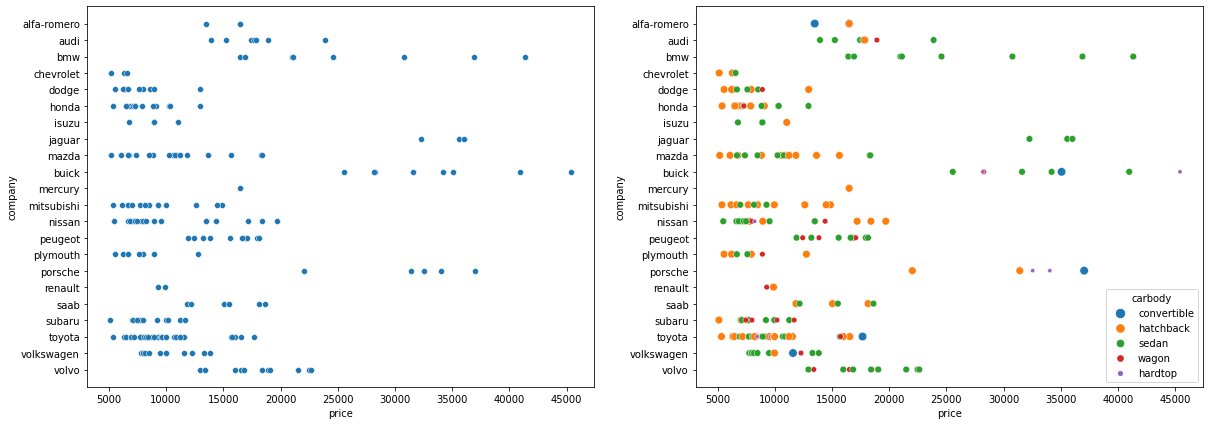

In [ ]:
plt.figure(figsize= (20,7))

plt.subplot(1,2,1)
sns.scatterplot(data = car, x = 'price', y = 'company')
plt.xticks(rotation = 0)

plt.subplot(1,2,2)
sns.scatterplot(data = car, x = 'price', y = 'company', hue = 'carbody', size = 'carbody')
plt.xticks(rotation = 0)

plt.show()

- These distributions show us that in general all the companies have a wide range of prices and the carbodys have differents prices in this range.

- It is relevant that BMW, Jaguar, Buick and Porsche have the most expensive cars with are convetible, sedan or hartop carbody.

- The cheaper carbody is the hatchback.

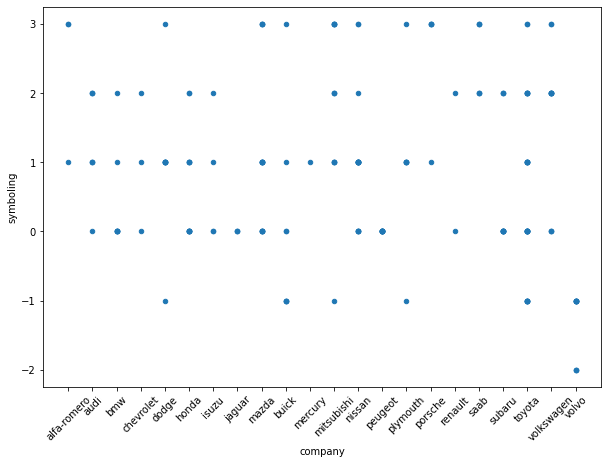

In [ ]:
car.plot(kind = 'scatter', x = 'company', y = 'symboling', figsize = (10,7))
plt.xticks(rotation = 45)


plt.show()

- Symboling is not representing any important attribute into the dataset.

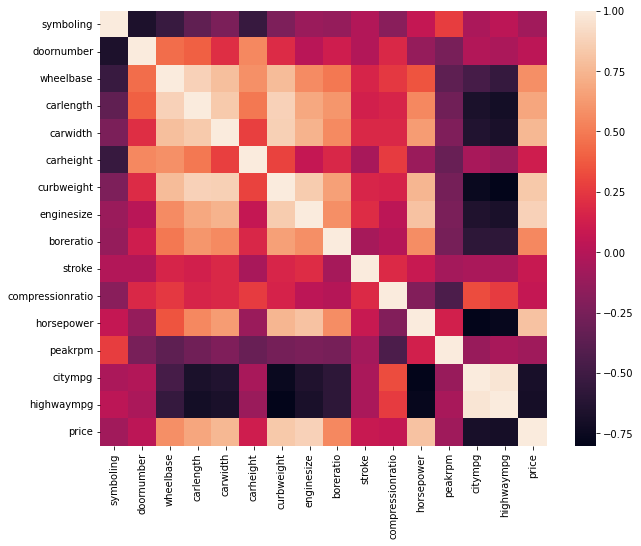

In [ ]:
plt.figure(figsize = (10,8))

sns.heatmap(car.corr())

plt.show()

In [ ]:
car.corr().price.sort_values(ascending = False )

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
doornumber          0.031835
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

The enginesize, curbweight, horsepower and carwidth are the variables that are more positive correlate with the price variable, meanwhile the highwaympg and citympg are negative correlate.
